# עבודה מספר 7 - קלאסיפיקציה

# חלק א' - מחירי יהלומים

In [1]:
#Create a folder in google's cloud for my stuff
!mkdir /root/.kaggle/ 

In [2]:
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"shaharoded","key":"47649d0e189bb2974572b495b853facb"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# searching for the dataset
!kaggle datasets list -s diamonds

ref                                                        title                                              size  lastUpdated          downloadCount  
---------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
shivam2503/diamonds                                        Diamonds                                          733KB  2017-05-25 03:06:57          46526  
miguelcorraljr/brilliant-diamonds                          Brilliant Diamonds                                  1MB  2020-12-14 04:18:52            696  
resulcaliskan/diamonds                                     diamonds                                          582KB  2021-05-15 10:46:58             80  
dysphoria/poker-hand-classification                        Poker Hand Classification                           7MB  2018-11-13 17:47:22            620  
kalilurrahman/berkshire-hathaway-stock-latest-and-updated  Berkshire Hathaway - St

In [4]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/diamonds

# download the dataset from Kaggle and unzip it
!kaggle datasets download shivam2503/diamonds  -f diamonds.csv -p ./datasets/diamonds/

  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 23.9MB/s]


In [5]:
#Unzip 
!unzip ./datasets/diamonds/diamonds.csv.zip  -d ./datasets/diamonds/

Archive:  ./datasets/diamonds/diamonds.csv.zip
  inflating: ./datasets/diamonds/diamonds.csv  


In [6]:
#pick libraries I want to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn import metrics

In [7]:
#create objects to work on (table) - paste the link of the files from the folder in the left
diamonds_full_db = pd.read_csv("/content/datasets/diamonds/diamonds.csv")
diamonds_full_db

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# שאלה 1
צרו מודל שכנים לפי 3 שכנים החוזה מה תהיה הבהירות של יהלום, לפי יתר הנתונים הנומריים עליו כמפורט מטה

In [8]:

#first, test train split
train_df, test_df = train_test_split(diamonds_full_db, test_size=0.2)
#model creation
knn_classifier = KNeighborsClassifier(n_neighbors=3)
featues_list = ["table", "price", "depth", "carat","y","x"]
knn_classifier.fit(train_df[featues_list], train_df["clarity"].values)
#test
clarity_values_test_list= test_df["clarity"].values
predict_clarity_list = knn_classifier.predict(test_df[featues_list])
predict_clarity_list


array(['VS1', 'SI1', 'VS1', ..., 'VS2', 'VS2', 'VS1'], dtype=object)

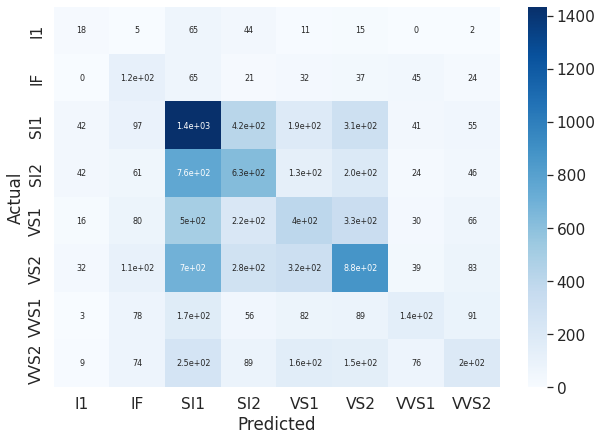

In [9]:
#assembling a confusion metrics as a heat map
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = metrics.confusion_matrix(clarity_values_test_list,predict_clarity_list)
df_cm = pd.DataFrame(cm, columns=knn_classifier.classes_, index = knn_classifier.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 8})# font size


In [10]:
#checking the model's accuracy and f1 
#accuracy:
accuracy = metrics.accuracy_score(clarity_values_test_list,predict_clarity_list)
print(f'model\'s acurracy is: {accuracy}')
#f1 score:
from sklearn.metrics import f1_score
f1 = f1_score(clarity_values_test_list,predict_clarity_list, average='macro') #for each category individually
print(f'model\'s F1 is: {f1}')

model's acurracy is: 0.35409714497589917
model's F1 is: 0.2895964501142879


# שאלה 2
עבור מודלים במספר שכנים משתנה, צרו גרף המציג את דיוק המודל לפי המדדים שנבדקו

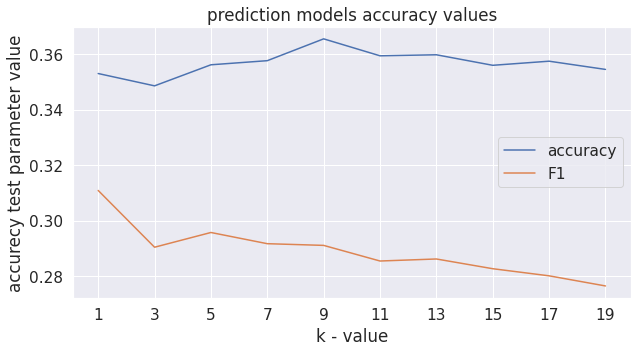

In [20]:
k_values = []
accuracy_values = []
f1_values = []
#first, test train split
train_df, test_df = train_test_split(diamonds_full_db, test_size=0.2)

for k in range(1,21,2):
  #model creation
  knn_classifier = KNeighborsClassifier(n_neighbors=k)#k change
  featues_list = ["table", "price", "depth", "carat","y","x"]
  knn_classifier.fit(train_df[featues_list], train_df["clarity"].values)
  #test
  clarity_values_test_list= test_df["clarity"].values
  predict_clarity_list = knn_classifier.predict(test_df[featues_list])

  accuracy = metrics.accuracy_score(clarity_values_test_list,predict_clarity_list)
  f1 = f1_score(clarity_values_test_list,predict_clarity_list, average='macro') #for each category individually

  #creating series for plots:
  k_values.append(k)
  accuracy_values.append(accuracy)
  f1_values.append(f1)

#and plotting the predictions:
y = accuracy_values
z = f1_values
ki = list(range(len(k_values)))
plt.figure(figsize=(10,5))
plt.plot(ki, y, label='accuracy')
plt.plot(ki, z, label='F1')

plt.xticks(ki, k_values)
plt.xlabel("k - value")
plt.ylabel("accurecy test parameter value")
plt.title("prediction models accuracy values")

plt.legend()

In [21]:
#and for seaborn visuality:
df = pd.DataFrame(columns=["k","f1","accuracy"])
df["k"] = k_values
df["f1"] = f1_values
df["accuracy"] = accuracy_values

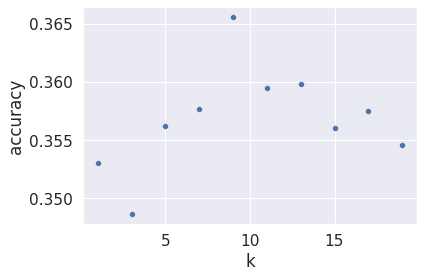

In [22]:
sns.scatterplot(x="k", y="accuracy", data=df)

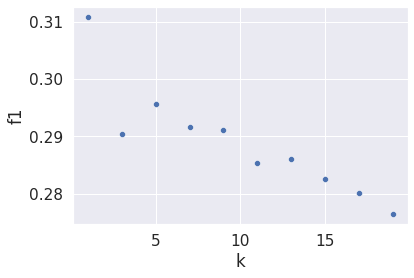

In [23]:
sns.scatterplot(x="k", y="f1", data=df)

# שאלה 3 
בנו מודלי שכנות ומודל עץ החוזים את ערך החיתוך של יהלום

In [14]:
from sklearn import metrics
from sklearn import preprocessing
#cut
le = preprocessing.LabelEncoder()
cut_values = set(diamonds_full_db['cut'].values)
le.fit(list(cut_values))
l = le.transform(diamonds_full_db['cut'].values)
diamonds_full_db['cut_number'] = l
#clarity
clarity_values = set(diamonds_full_db['clarity'].values)
le.fit(list(clarity_values))
clarity = le.transform(diamonds_full_db['clarity'].values)
diamonds_full_db['clarity_number'] = clarity
#color
color_values = set(diamonds_full_db['color'].values)
le.fit(list(color_values))
color = le.transform(diamonds_full_db['color'].values)
diamonds_full_db['color_number'] = color

diamonds_full_db = diamonds_full_db.dropna(axis=0)
diamonds_full_db

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut_number,clarity_number,color_number
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,3,1
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,2,1
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,4,1
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,2,0
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,2,0
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4,2,0
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3,3,4


In [15]:
#first, test train split
train_df, test_df = train_test_split(diamonds_full_db, test_size=0.2)
accuracy_dict = {}
#k-nn models:
for k in range(1,8,2):
  #model creation
  knn_classifier = KNeighborsClassifier(n_neighbors=k)#k change
  featues_list = ["table", "price", "depth", "carat","y","x"]
  knn_classifier.fit(train_df[featues_list], train_df["cut"].values)
  #test
  cut_values_test_list= test_df["cut"].values
  predict_cut_list = knn_classifier.predict(test_df[featues_list])

  accuracy = metrics.accuracy_score(cut_values_test_list,predict_cut_list)
  accuracy_dict[f'{k}-neighbors model'] = accuracy
  print(f'k-neighbors model for {k} neighbors prediction the diamonds cut asaccuracy of: {accuracy}')

#tree model
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor(random_state=0)
featues_list = ["table", "price", "depth", "carat","y","x"]
tree_reg.fit(train_df[featues_list], train_df["cut_number"].values)

cut_values_test_list= test_df["cut_number"].values
predict_cut_list = tree_reg.predict(test_df[featues_list])
accuracy = metrics.accuracy_score(cut_values_test_list,predict_cut_list)
accuracy_dict[f'tree model'] = accuracy
print(f'tree model predicting the diamonds cut accuracy is: {accuracy}')


k-neighbors model for 1 neighbors prediction the diamonds cut asaccuracy of: 0.5574712643678161
k-neighbors model for 3 neighbors prediction the diamonds cut asaccuracy of: 0.5597886540600667
k-neighbors model for 5 neighbors prediction the diamonds cut asaccuracy of: 0.5632183908045977
k-neighbors model for 7 neighbors prediction the diamonds cut asaccuracy of: 0.5528364849833148
tree model predicting the diamonds cut accuracy is: 0.6941972562106044


In [16]:
#best model
for key in accuracy_dict.keys():
  if accuracy_dict[key] == max(accuracy_dict.values()):
    print(f'The most accurate model is: {key} with accuracy of: {accuracy_dict[key]}')

The most accurate model is: tree model with accuracy of: 0.6941972562106044


# שאלה 4
הוסיפו למודלים מידע על צבע היהלום ודרגת הבהירות שלו. מה המודל הטוב ביותר כעת?

In [17]:
accuracy_dict = {}
#k-nn models:
for k in range(1,8,2):
  #model creation
  knn_classifier = KNeighborsClassifier(n_neighbors=k)#k change
  featues_list = ["table", "price", "depth", "carat","y","x","color_number","clarity_number"]
  knn_classifier.fit(train_df[featues_list], train_df["cut"].values)
  #test
  cut_values_test_list= test_df["cut"].values
  predict_cut_list = knn_classifier.predict(test_df[featues_list])

  accuracy = metrics.accuracy_score(cut_values_test_list,predict_cut_list)
  accuracy_dict[f'{k}-neighbors model'] = accuracy
  print(f'k-neighbors model for {k} neighbors prediction the diamonds cut asaccuracy of: {accuracy}')

#tree model
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor(random_state=0)
featues_list = ["table", "price", "depth", "carat","y","x","clarity_number","color_number"]
tree_reg.fit(train_df[featues_list], train_df["cut_number"].values)

cut_values_test_list= test_df["cut_number"].values
predict_cut_list = tree_reg.predict(test_df[featues_list])
accuracy = metrics.accuracy_score(cut_values_test_list,predict_cut_list)
accuracy_dict[f'tree model'] = accuracy
print(f'tree model predicting the diamonds cut accuracy is: {accuracy}')

k-neighbors model for 1 neighbors prediction the diamonds cut asaccuracy of: 0.5419911012235817
k-neighbors model for 3 neighbors prediction the diamonds cut asaccuracy of: 0.5323507601038191
k-neighbors model for 5 neighbors prediction the diamonds cut asaccuracy of: 0.5404152762328513
k-neighbors model for 7 neighbors prediction the diamonds cut asaccuracy of: 0.5302187615869485
tree model predicting the diamonds cut accuracy is: 0.6909529106414535


In [18]:
#best model
for key in accuracy_dict.keys():
  if accuracy_dict[key] == max(accuracy_dict.values()):
    print(f'The most accurate model is: {key} with accuracy of: {accuracy_dict[key]}')

The most accurate model is: tree model with accuracy of: 0.6909529106414535


הוספת הנתונים למודלים לא שיפרה את יכולת החיזוי שלהם

# שאלה 5
עבור 5 שכנים, בנו מודלים המחושב ע"ס קובץ אימון בגדלים משתנים, והציגו את מידת הדיוק שלו כפונקציה של גודל קובץ האימון

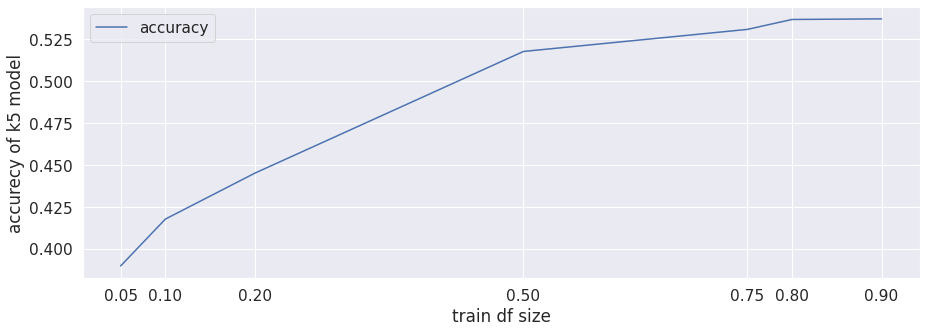

In [24]:
train_df_size = [0.05,0.1,0.2,0.5,0.75,0.8,0.9]
accuracy_values = []
full_train_df, test_df = train_test_split(diamonds_full_db, test_size= 0.1)
real_test_file = test_df
for i in train_df_size:
  #first, test train split
  train_df, test_df = train_test_split(full_train_df, train_size= i)

  #model creation
  knn_classifier = KNeighborsClassifier(n_neighbors=5)
  featues_list = ["table", "price", "depth", "carat","y","x","color_number","clarity_number"]
  knn_classifier.fit(train_df[featues_list], train_df["cut"].values)

  #test
  clarity_values_test_list= real_test_file["cut"].values
  predict_clarity_list = knn_classifier.predict(real_test_file[featues_list])

  accuracy = metrics.accuracy_score(clarity_values_test_list,predict_clarity_list)
  accuracy_values.append(accuracy)


#and plotting the predictions:
y = accuracy_values
#xi = list(range(len(train_df_size)))
plt.figure(figsize=(15,5))
plt.plot(train_df_size, y, label='accuracy')

plt.xticks(train_df_size)
plt.xlabel("train df size")
plt.ylabel("accurecy of k5 model")

plt.legend()